In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Retrieve QLD traffic data that has average traffic data by hour and by day in 2023.
qld_traffic_df = pd.read_excel('Resources/qld-traffic-data-average-by-hour-by-day-2023.xlsx')
qld_traffic_df.head()

,SITE_ID,DESCRIPTION,SITE_DISTANCE,LONGITUDE,LATITUDE,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,GAZETTAL_DIRECTION,HOURS,MON,TUE,WED,THU,FRI,SAT,SUN,WEEKDAY_AVERAGE,WEEKEND_AVERAGE
0,131646,""" Sth of Myora Res- Dunwich""",2.5,153.411081,-27.482689,1000,"""EAST COAST ROAD""",0.0,9.36,AGAINST GAZETTAL,0 to 1,0.0,1.0,0.0,0.0,1.0,2,4.0,0,3
1,131646,""" Sth of Myora Res- Dunwich""",2.5,153.411081,-27.482689,1000,"""EAST COAST ROAD""",0.0,9.36,AGAINST GAZETTAL,1 to 2,1.0,0.0,0.0,0.0,1.0,2,1.0,0,2
2,131646,""" Sth of Myora Res- Dunwich""",2.5,153.411081,-27.482689,1000,"""EAST COAST ROAD""",0.0,9.36,AGAINST GAZETTAL,2 to 3,0.0,0.0,0.0,2.0,0.0,1,1.0,0,1
3,131646,""" Sth of Myora Res- Dunwich""",2.5,153.411081,-27.482689,1000,"""EAST COAST ROAD""",0.0,9.36,AGAINST GAZETTAL,3 to 4,1.0,1.0,1.0,1.0,1.0,1,1.0,1,1
4,131646,""" Sth of Myora Res- Dunwich""",2.5,153.411081,-27.482689,1000,"""EAST COAST ROAD""",0.0,9.36,AGAINST GAZETTAL,4 to 5,6.0,6.0,6.0,8.0,6.0,2,1.0,6,1


In [3]:
qld_traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84240 entries, 0 to 84239
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SITE_ID             84240 non-null  int64  
 1   DESCRIPTION         84240 non-null  object 
 2   SITE_DISTANCE       84240 non-null  float64
 3   LONGITUDE           84240 non-null  float64
 4   LATITUDE            84240 non-null  float64
 5   RSECT_ID            84240 non-null  object 
 6   ROAD_NAME           84240 non-null  object 
 7   TDIST_START         84240 non-null  float64
 8   TDIST_END           84240 non-null  float64
 9   GAZETTAL_DIRECTION  84240 non-null  object 
 10  HOURS               84240 non-null  object 
 11  MON                 84192 non-null  float64
 12  TUE                 84192 non-null  float64
 13  WED                 84096 non-null  float64
 14  THU                 83952 non-null  float64
 15  FRI                 84192 non-null  float64
 16  SAT 

In [4]:
# Converting column 'SAT' dtype from int64 to float64
qld_traffic_df['SAT'] = qld_traffic_df['SAT'].astype('float64')

In [5]:
# Find site_id value for M1 highway
# M1 Highway is also called Pacific Highway
m1_traffic_df = qld_traffic_df[qld_traffic_df['ROAD_NAME'].str.contains(r'(M1|Pacific).*(Highway|Motorway)', case=False, na=False)]
m1_traffic_df.head()

/var/folders/4c/qxymt3y16qj5kt7d4m_0kkk00000gn/T/ipykernel_3088/717087483.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  m1_traffic_df = qld_traffic_df[qld_traffic_df['ROAD_NAME'].str.contains(r'(M1|Pacific).*(Highway|Motorway)', case=False, na=False)]


,SITE_ID,DESCRIPTION,SITE_DISTANCE,LONGITUDE,LATITUDE,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,GAZETTAL_DIRECTION,HOURS,MON,TUE,WED,THU,FRI,SAT,SUN,WEEKDAY_AVERAGE,WEEKEND_AVERAGE
12144,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,AGAINST GAZETTAL,0 to 1,259.0,234.0,251.0,250.0,268.0,359.0,477.0,252,417
12145,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,AGAINST GAZETTAL,1 to 2,211.0,198.0,217.0,220.0,236.0,265.0,334.0,216,299
12146,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,AGAINST GAZETTAL,2 to 3,246.0,248.0,256.0,261.0,264.0,230.0,251.0,255,240
12147,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,AGAINST GAZETTAL,3 to 4,560.0,570.0,587.0,571.0,583.0,327.0,269.0,574,298
12148,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,AGAINST GAZETTAL,4 to 5,1895.0,1959.0,1983.0,1901.0,1802.0,716.0,444.0,1908,581


In [6]:
print(m1_traffic_df['ROAD_NAME'].unique())
print(m1_traffic_df['RSECT_ID'].unique())

['"PACIFIC HIGHWAY (PACIFIC MOTORWAY)"'
 '"PACIFIC HIGHWAY CONNECTION ROAD"'
 '"SOUTH-EAST ARTERIAL ROAD (PACIFIC MOTORWAY)"']
['12A' 906 'U12A']


The Pacific Motorway starts from Brisbane CBD. For this analysis, I've set the range from Springwood (Exit No.19) to Burleigh Heads (Exit No.89).

- **12A** refers to the M1 Motorway segment connecting Logan and the NSW/QLD border.
- **U12A** is the section from the CBD to Logan (before 12A).
- **906** connects the Logan Sub-Arterial Road and 12A.

Therefore, the correct data range for this analysis is **12A**.

In [7]:
m1_traffic_df = m1_traffic_df[(m1_traffic_df['RSECT_ID']=='12A') & (m1_traffic_df['GAZETTAL_DIRECTION']=='GAZETTAL')].reset_index(drop=True)
m1_traffic_df.head()

,SITE_ID,DESCRIPTION,SITE_DISTANCE,LONGITUDE,LATITUDE,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,GAZETTAL_DIRECTION,HOURS,MON,TUE,WED,THU,FRI,SAT,SUN,WEEKDAY_AVERAGE,WEEKEND_AVERAGE
0,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,0 to 1,403.0,440.0,446.0,474.0,539.0,722.0,760.0,460,741
1,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,1 to 2,248.0,303.0,310.0,319.0,375.0,453.0,466.0,311,460
2,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,2 to 3,244.0,298.0,314.0,324.0,348.0,338.0,338.0,306,338
3,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,3 to 4,374.0,402.0,430.0,446.0,460.0,357.0,321.0,422,339
4,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,4 to 5,995.0,1037.0,1078.0,1090.0,1070.0,627.0,478.0,1054,553


**Gazettal direction** refers to the direction of traffic flow.  
The **Pacific Highway** starts from the **CBD** side and heads toward the **Gold Coast**. Since I mostly drive on this side of the road, I focused on analyzing it. Therefore, I extracted data with the relevant **Gazettal** value.

In [17]:
sites = dict(m1_traffic_df[['SITE_ID', 'DESCRIPTION']].drop_duplicates().values)
sites

{131796: '"Pac Mwy sth side Paradise Rd overpass"',
 136399: '"Pacific Mwy North of Mandew St Overpass"',
 135793: '"CS72 on PM just north of Nandala Dr"',
 13006: '"130m Nrth of Pimpama River PM5749"',
 12205: '"1.9 km North of Foxwell Rd"',
 11641: '"320m Sth Smith St OverPass"',
 11399: '"Between Neilsens and Elysium Rd"',
 160229: '"PM NB 350m south of Exit 80"',
 12058: '"WiM Site Tugun Bypass"'}

In [9]:
# Changing 'Hours' column values to starting time
# '0 to 1' -> 0
# '23 to 24' -> 23
m1_traffic_df['HOURS'] = m1_traffic_df['HOURS'].apply(lambda x: int(x.split()[0]))

First, I analyzed average traffic by day throughout all M1 sites.

In [10]:
day_label = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
avg_traffic_by_day = m1_traffic_df[day_label].mean()
avg_traffic_by_day

MON    2700.212963
TUE    2760.162037
WED    2852.856481
THU    2911.611111
FRI    2981.513889
SAT    2559.009259
SUN    2181.689815
dtype: float64

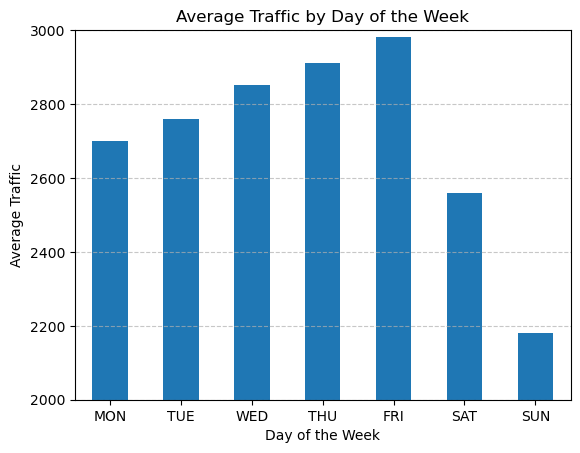

In [11]:
avg_traffic_by_day.plot(kind='bar')
plt.title('Average Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic')
plt.ylim(2000,3000)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It seems like the traffic increased gradually during the weekdays and decrease significantly on the weekends.
This time, I compared and analyzed traffic volume by time of day across different section.

In [22]:
m1_traffic_df

,SITE_ID,DESCRIPTION,SITE_DISTANCE,LONGITUDE,LATITUDE,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,GAZETTAL_DIRECTION,HOURS,MON,TUE,WED,THU,FRI,SAT,SUN,WEEKDAY_AVERAGE,WEEKEND_AVERAGE
0,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,0,403.0,440.0,446.0,474.0,539.0,722.0,760.0,460,741
1,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,1,248.0,303.0,310.0,319.0,375.0,453.0,466.0,311,460
2,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,2,244.0,298.0,314.0,324.0,348.0,338.0,338.0,306,338
3,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,3,374.0,402.0,430.0,446.0,460.0,357.0,321.0,422,339
4,131796,"""Pac Mwy sth side Paradise Rd overpass""",5.9,153.140291,-27.639688,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",2.6,6.54,GAZETTAL,4,995.0,1037.0,1078.0,1090.0,1070.0,627.0,478.0,1054,553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,12058,"""WiM Site Tugun Bypass""",79.0,153.494730,-28.159915,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",76.3,79.23,GAZETTAL,19,705.0,730.0,830.0,975.0,1088.0,749.0,690.0,866,719
212,12058,"""WiM Site Tugun Bypass""",79.0,153.494730,-28.159915,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",76.3,79.23,GAZETTAL,20,499.0,529.0,587.0,708.0,833.0,637.0,508.0,632,572
213,12058,"""WiM Site Tugun Bypass""",79.0,153.494730,-28.159915,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",76.3,79.23,GAZETTAL,21,351.0,393.0,444.0,566.0,643.0,544.0,369.0,480,456
214,12058,"""WiM Site Tugun Bypass""",79.0,153.494730,-28.159915,12A,"""PACIFIC HIGHWAY (PACIFIC MOTORWAY)""",76.3,79.23,GAZETTAL,22,234.0,261.0,304.0,373.0,461.0,469.0,242.0,327,354


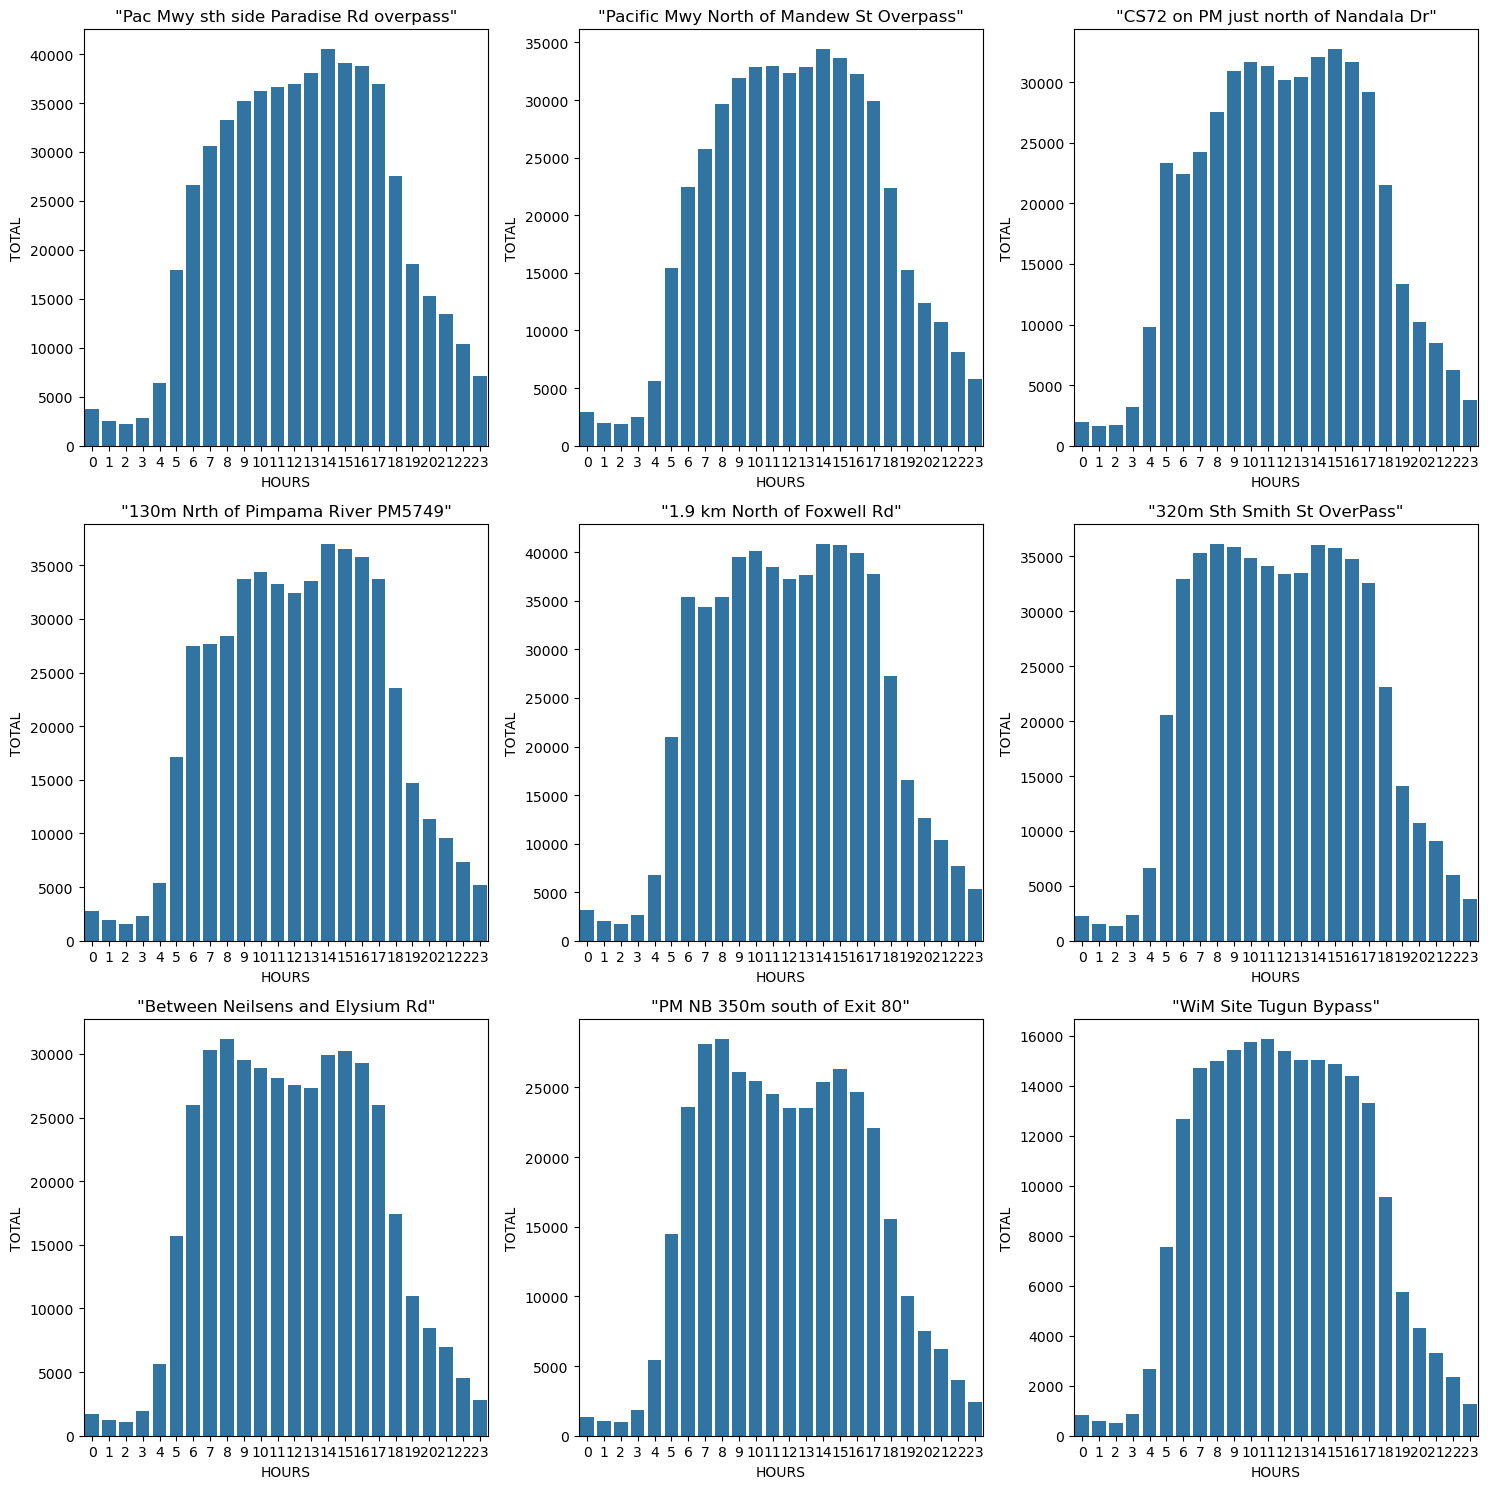

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5*3))
axes = axes.flatten()

for i, site in enumerate(sites.keys()) :
    site_df = m1_traffic_df[m1_traffic_df['SITE_ID']==site].copy()
    site_df['TOTAL'] = site_df[day_label].sum(axis=1)
    
    sns.barplot(x='HOURS', y='TOTAL', data=site_df, ax=axes[i])
    axes[i].set_title(sites[site])

plt.tight_layout()
plt.show()